# Feature Scaling Standardiztion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline
# sns.set_style('darkgrid')

In [2]:
df = pd.read_csv(r'C:\Users\AmiteshOP\Downloads\Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.shape

(400, 5)

In [5]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [6]:
df.nunique()

User ID            400
Gender               2
Age                 43
EstimatedSalary    117
Purchased            2
dtype: int64

In [7]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [9]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [10]:
df=df.iloc[:,2:]

In [11]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


# train test split

In [12]:
y=df['Purchased']
X=df.drop('Purchased',axis=1)

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.3,
                                                random_state=0)

In [14]:
X_train.shape , X_test.shape,y_test.shape,y_train.shape

((280, 2), (120, 2), (120,), (280,))

# SatndardScaler

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [16]:
# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [17]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [18]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [19]:
# there one problem if send dataframe they return np array
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [20]:
X_test.shape

(120, 2)

In [44]:
# now convert array into dataframe
X_train_scaler=pd.DataFrame(X_train_scaler,columns=X_train.columns)
X_test_scaler= pd.DataFrame(X_test_scaler,columns=X_train.columns)

In [22]:
X_train_scaler 

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [23]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [24]:
np.round(X_train_scaler.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


# effect of scaling

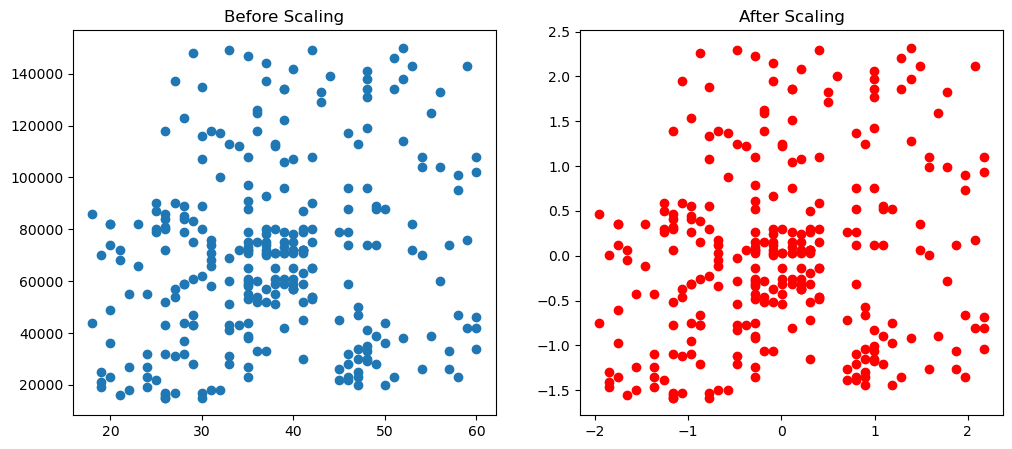

In [25]:
fig ,(ax1 ,ax2) =plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')

ax2.scatter(X_train_scaler['Age'],X_train_scaler['EstimatedSalary'],color='red')
ax2.set_title('After Scaling');


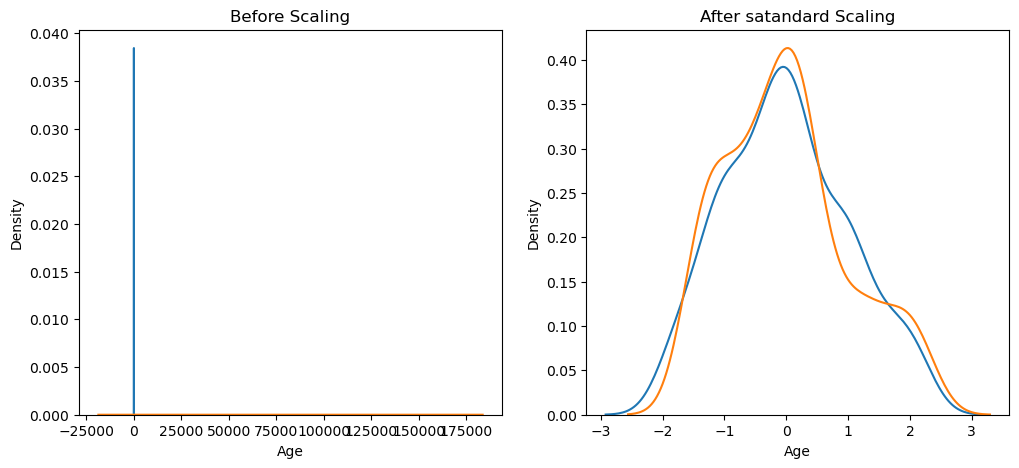

In [26]:
fig ,(ax1 ,ax2) =plt.subplots(ncols=2,figsize=(12,5))
# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after standard scaling
ax2.set_title('After satandard Scaling')
sns.kdeplot(X_train_scaler['Age'], ax=ax2)
sns.kdeplot(X_train_scaler['EstimatedSalary'], ax=ax2)
plt.show()

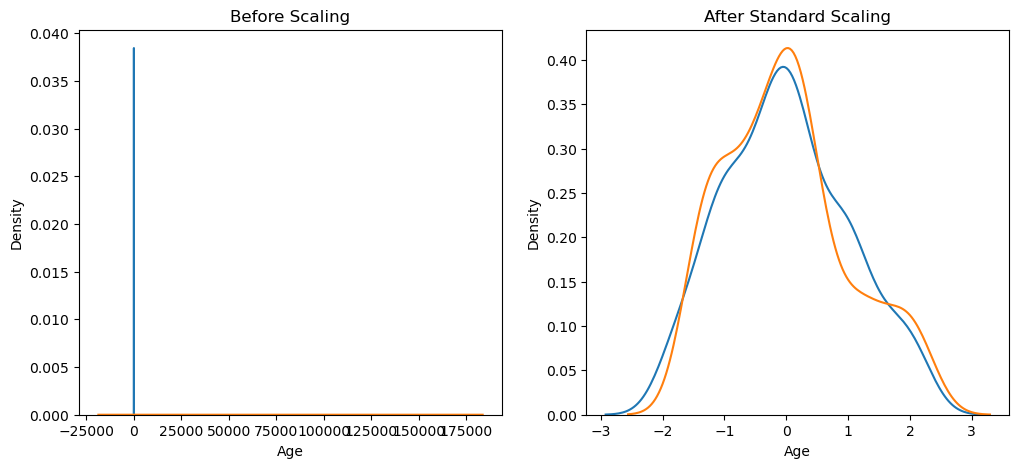

In [27]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaler['Age'], ax=ax2)
sns.kdeplot(X_train_scaler['EstimatedSalary'], ax=ax2)
plt.show()

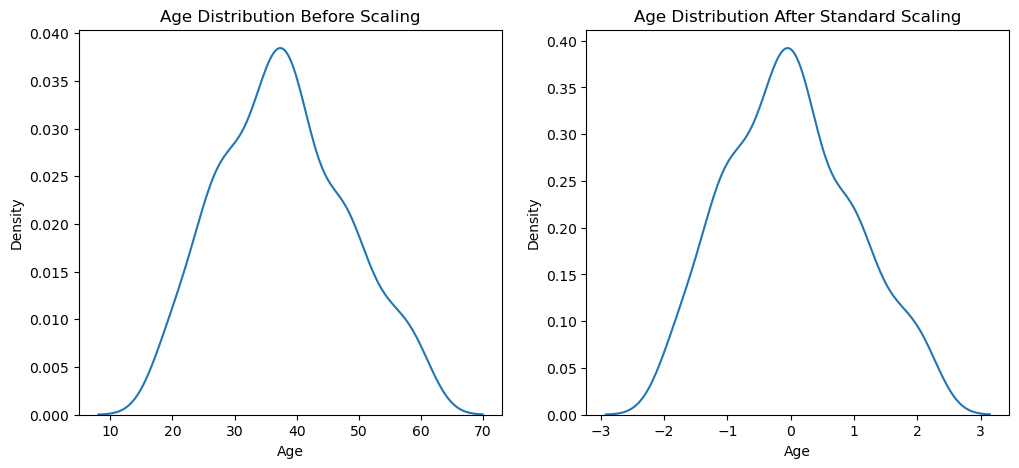

In [28]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaler['Age'], ax=ax2)
plt.show()

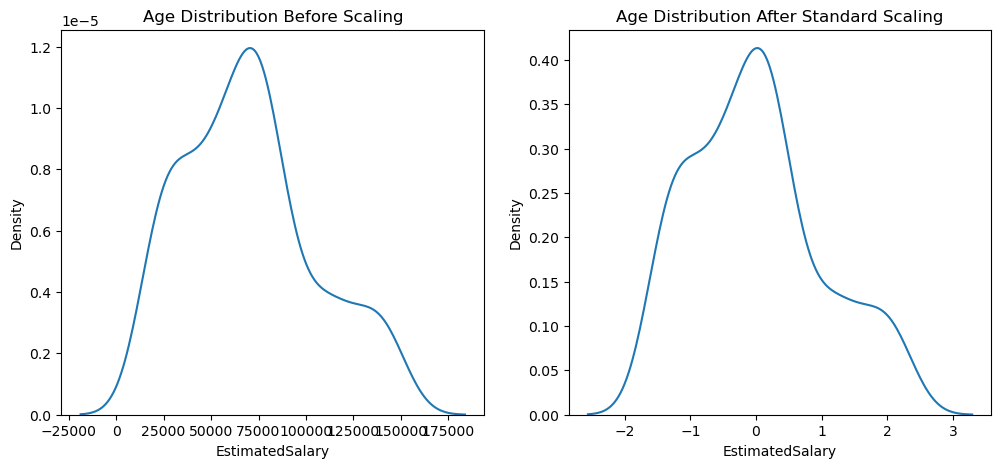

In [29]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaler['EstimatedSalary'], ax=ax2)
plt.show()

# why scaling is important?

In [45]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_scaler =LogisticRegression()

In [46]:
lr.fit(X_train,y_train)
lr_scaler.fit(X_train_scaler,y_train)

LogisticRegression()

In [47]:
y_pred = lr.predict(X_test)
y_pred_scaler = lr_scaler.predict(X_test_scaler)

In [48]:
from sklearn.metrics import accuracy_score

In [50]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaler))

Actual 0.6583333333333333
Scaled 0.8666666666666667


In [51]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_scaler = DecisionTreeClassifier()

In [55]:
dt.fit(X_train,y_train)
dt_scaler.fit(X_train_scaler,y_train)

DecisionTreeClassifier()

In [58]:
y_pred=dt.predict(X_test)
y_pred_scaler=dt_scaler.predict(X_test_scaler)

In [59]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaler))

Actual 0.875
Scaled 0.875


In [60]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [63]:
df=df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}))

C:\Users\AmiteshOP\AppData\Local\Temp\ipykernel_21224\3075042307.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}))


In [64]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


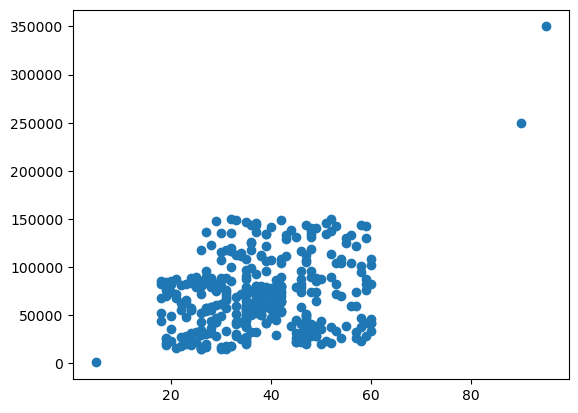

In [65]:
plt.scatter(df['Age'],df['EstimatedSalary']);